In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)
import numpy as np

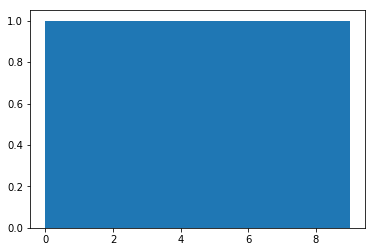

In [2]:
plt.hist(np.arange(10))
plt.show()

In [3]:
from __future__ import print_function
import time, os, glob
import ROOT
from array import array
from root_numpy import hist2array

Welcome to JupyROOT 6.20/02


In [4]:
regions = ['sr', 'sb', 'sblo', 'sbhi']
#regions = ['sr']
pt, mgg = {}, {}
#Run2017B-F_region_sblo_blind_None_selected_phoEt_list.txt
for r in regions:
    in_files = glob.glob('Weights/Run2017B-F_region_%s_blind_None_selected_phoEt_list.txt'%r)
    print(in_files)
    
    pt[r], mgg[r] = [], []
    for in_file in in_files:
        f = open(in_file, "r")
        for i,l in enumerate(f):
            pt0_, pt1_, _, _, mgg_ = l.replace('\n','').split(':')
            pt[r].append([float(pt0_), float(pt1_)])
            mgg[r].append(float(mgg_))
            #if i > 10000: break

    pt[r] = np.array(pt[r])
    mgg[r] = np.array(mgg[r])
    assert len(pt[r]) == len(mgg[r])
    print(pt[r][:2])
    print(len(pt[r]))

['Weights/Run2017B-F_region_sr_blind_None_selected_phoEt_list.txt']
[[82.115845 44.247128]
 [75.725586 50.391171]]
167218
['Weights/Run2017B-F_region_sb_blind_None_selected_phoEt_list.txt']
[[54.077515 43.624519]
 [61.857235 28.981277]]
188747
['Weights/Run2017B-F_region_sblo_blind_None_selected_phoEt_list.txt']
[[54.077515 43.624519]
 [61.857235 28.981277]]
128866
['Weights/Run2017B-F_region_sbhi_blind_None_selected_phoEt_list.txt']
[[113.615288  64.203476]
 [ 92.737778  76.954468]]
59881


In [5]:
idxs_sort = {}
for k in ['sblo', 'sbhi']:
    print(k)
    print(mgg[k][:3])
    print(pt[k][:3])
    idxs_sort[k] = np.argsort(mgg[k])
    #print(mgg[k][idxs_sort[k]][:3])
    mgg[k] = mgg[k][idxs_sort[k]]
    pt[k] = pt[k][idxs_sort[k]]
    print(mgg[k][:3])
    print(pt[k][:3])

sblo
[102.290047 105.939568 103.110565]
[[54.077515 43.624519]
 [61.857235 28.981277]
 [71.906158 38.974968]]
[100.000031 100.000031 100.000038]
[[57.060104 33.38752 ]
 [67.889877 27.494492]
 [65.194283 36.014042]]
sbhi
[179.398376 162.913467 144.408661]
[[113.615288  64.203476]
 [ 92.737778  76.954468]
 [ 51.167088  43.426243]]
[140.       140.000137 140.000473]
[[ 49.761028  48.271812]
 [ 61.548851  38.000595]
 [117.239388  40.71983 ]]


In [6]:
print(len(pt['sr']))
print(len(pt['sblo']))
print(len(pt['sbhi']))
sbfrac = 0.2
print(sbfrac*len(pt['sr']))
nsb = int(np.ceil(sbfrac*len(pt['sr'])))
print(nsb)

167218
128866
59881
33443.6
33444


In [7]:
print(len(mgg['sblo']))
print(mgg['sblo'][-nsb:][-3:])
print(len(mgg['sblo'][-nsb:]))

print(len(mgg['sbhi']))
print(mgg['sbhi'][:nsb][:3])
print(len(mgg['sbhi'][:nsb]))

128866
[109.999397 109.999756 109.999817]
33444
59881
[140.       140.000137 140.000473]
33444


In [8]:
print(pt['sr'].shape)
print(pt['sblo'].shape)
pt['srsblo'] = np.concatenate([pt['sr'], pt['sblo'][-nsb:]])
print(pt['srsblo'].shape)
pt['srsblo'] = pt['srsblo'][pt['srsblo'][:,0]>110./3.]
pt['srsblo'] = pt['srsblo'][pt['srsblo'][:,1]>110./4.]
print(pt['srsblo'].shape)

(167218, 2)
(128866, 2)
(200662, 2)
(200062, 2)


In [9]:
print(pt['sr'].shape)
print(pt['sbhi'].shape)
pt['srsbhi'] = np.concatenate([pt['sr'], pt['sbhi'][:nsb]])
print(pt['srsbhi'].shape)
pt['srsbhi'] = pt['srsbhi'][pt['srsbhi'][:,0]>110./3.]
pt['srsbhi'] = pt['srsbhi'][pt['srsbhi'][:,1]>110./4.]
print(pt['srsbhi'].shape)

(167218, 2)
(59881, 2)
(200662, 2)
(200662, 2)


In [10]:
wd, ht = int(440*1), int(400*1)

#lead
pt_bins_x_ = {}
dPt = 1
#pt_bins_x_[0] = np.arange(25,225+dPt,dPt)
#'''
pt_bins_x_[0] = np.arange(25,100,dPt)
dPt = 5
pt_bins_x_[1] = np.arange(100,120,dPt)
dPt = 20
pt_bins_x_[2] = np.arange(120,200,dPt)
dPt = 750-200
pt_bins_x_[3] = np.arange(200,750+dPt,dPt)
#'''
pt_bins_x = np.concatenate([pt_bin_ for pt_bin_ in pt_bins_x_.values()])
n_pt_bins_x = len(pt_bins_x)-1
pt_bins_x = array('d', list(pt_bins_x))
print(n_pt_bins_x)

84


In [11]:
#sublead
pt_bins_y_ = {}
dPt = 1
#pt_bins_y_[0] = np.arange(25,225+dPt,dPt)
#'''
pt_bins_y_[0] = np.arange(25,60,dPt)
dPt = 5
pt_bins_y_[1] = np.arange(60,100,dPt)
dPt = 5
pt_bins_y_[2] = np.arange(100,120,dPt)
dPt = 20
pt_bins_y_[3] = np.arange(120,200,dPt)
dPt = 750-200
pt_bins_y_[4] = np.arange(200,750+dPt,dPt)
#'''
pt_bins_y = np.concatenate([pt_bin_ for pt_bin_ in pt_bins_y_.values()])
n_pt_bins_y = len(pt_bins_y)-1
pt_bins_y = array('d', list(pt_bins_y))
print(n_pt_bins_y)

52


In [12]:
c, h = {}, {}

key = 'pt0vpt1'
#regions = ['sr', 'srsblo', 'sblo']
regions = ['sblo', 'sbhi', 'sb', 'sr', 'srsblo', 'srsbhi']
for r in regions:
    k = key+r
    print(r)
    #'''
    
    c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
    h[k] = ROOT.TH2F(k, k, n_pt_bins_x, pt_bins_x, n_pt_bins_y, pt_bins_y)
    #'''
    r_ = r.replace('shift','')
    for i in range(len(pt[r_])):
        if 'shift' in r:
            h[k].Fill(pt[r_][i][0]+20., pt[r_][i][1]+10.)
        else:
            h[k].Fill(pt[r_][i][0], pt[r_][i][1])

sblo
sbhi
sb
sr
srsblo
srsbhi


In [13]:
'''for ix in range(1, h[key+'srshift'].GetNbinsX()+1):
    for iy in range(1, h[key+'srshift'].GetNbinsY()+1):
        binc = h[key+'srshift'].GetBinContent(ix, iy)
        if binc == 0.: h[key+'srshift'].SetBinContent(ix, iy, 1.)'''

"for ix in range(1, h[key+'srshift'].GetNbinsX()+1):\n    for iy in range(1, h[key+'srshift'].GetNbinsY()+1):\n        binc = h[key+'srshift'].GetBinContent(ix, iy)\n        if binc == 0.: h[key+'srshift'].SetBinContent(ix, iy, 1.)"

['pt0vpt1sr', 'pt0vpt1srsblo', 'pt0vpt1sblo', 'pt0vpt1srsbhi', 'pt0vpt1sb', 'pt0vpt1sbhi']


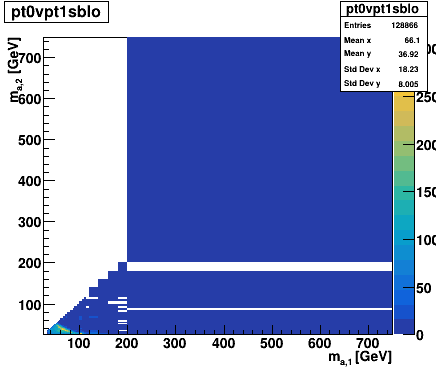

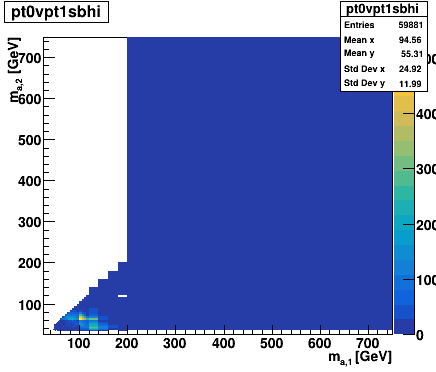

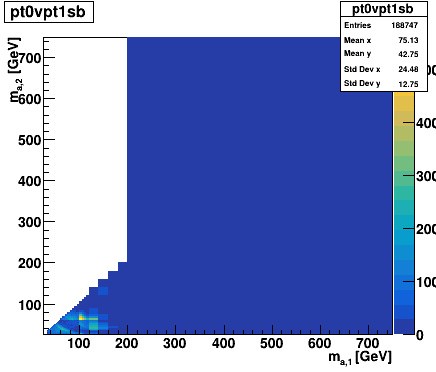

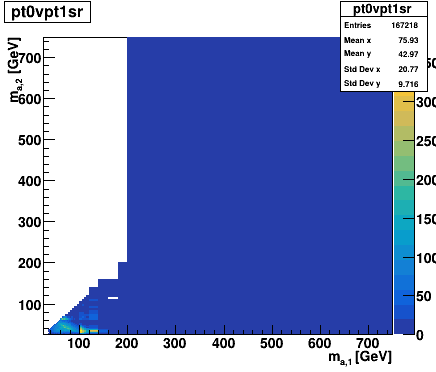

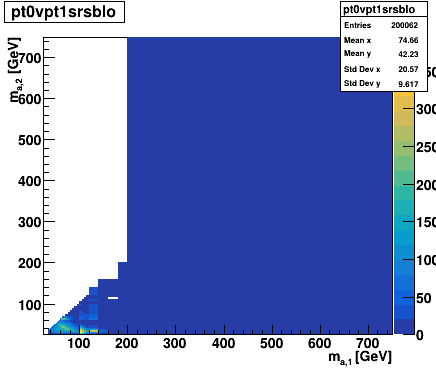

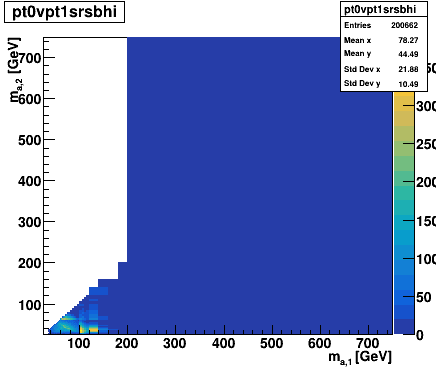

In [14]:
print(h.keys())
for r in regions:
    k = key+r
    c[k].cd()
    #if 'shift' in r:
    #    h[k].Multiply(h[key+'sr'])
    h[k].Draw("COLZ")
    h[k].GetYaxis().SetTitle("m_{a,2} [GeV]")
    h[k].GetXaxis().SetTitle("m_{a,1} [GeV]")
    c[k].Draw()

85 53
pt-ratio:
0.020509511 34.90719 0.98653024 2.0282464
Weights/Run2017B-F_sb2srsblo0p20_blind_None_ptwgts.npz
85 53
pt-ratio:
0.00904439 34.80281 1.0436516 2.0614579
Weights/Run2017B-F_sb2srsbhi0p20_blind_None_ptwgts.npz


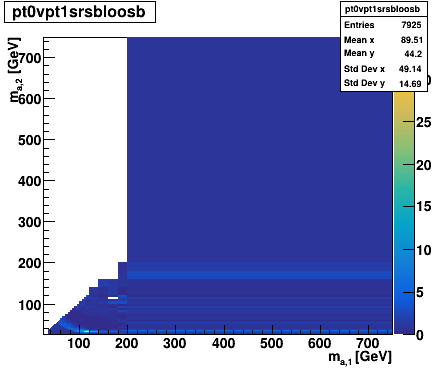

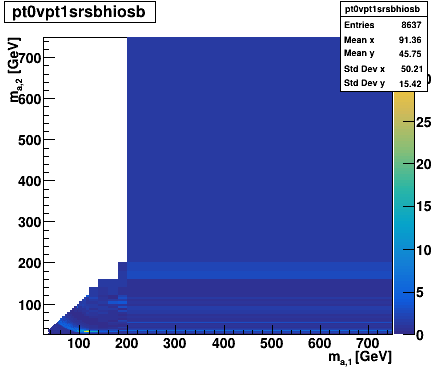

In [15]:
#tgts = ['sr', 'srsblo', 'srsbhi']
tgts = ['srsblo', 'srsbhi']
src = 'sb'
for tgt in tgts:
    ksrc = key+src
    ktgt = key+tgt
    kratio = key+tgt+'o'+src

    '''
    h[ktgt] = h[key+tgt+'a2h'].Clone()
    h[ktgt].SetName(ktgt)
    h[ktgt].SetTitle(ktgt)
    h[ksrc] = h[key+src+'a2h'].Clone()
    h[ksrc].SetName(ksrc)
    h[ksrc].SetTitle(ksrc)
    '''

    h[ktgt].Scale(1.e5/h[key+tgt].Integral())
    h[ksrc].Scale(1.e5/h[key+src].Integral())

    h[kratio] = h[ktgt].Clone()
    h[kratio].SetName(kratio)
    h[kratio].SetTitle(kratio)
    h[kratio].Divide(h[ksrc])

    c[kratio] = ROOT.TCanvas("c%s"%kratio,"c%s"%kratio,wd,ht)
    #print(h[kratio].Integral())
    #h[kratio].SetMaximum(10.)
    h[kratio].SetContour(100)
    h[kratio].Draw("COLZ")
    c[kratio].Draw()

    # hist2array().T origin @ lower left + (row, col) <=> (iy, ix)
    # NOTE: hist2array() drops uflow and ovflow bins => idx -> idx-1
    # row:sublead, col:lead
    ratio, pt_edges = hist2array(h[kratio], return_edges=True)
    ratio, pt_edges_lead, pt_edges_sublead = ratio.T, pt_edges[0], pt_edges[1]
    print(len(pt_edges_lead), len(pt_edges_sublead))
    
    # Remove unphysical values
    #ratio[ratio==0.] = 0.
    ratio[np.isnan(ratio)] = 1.
    print('pt-ratio:')
    print(ratio[ratio>0.].min(), ratio.max(), np.mean(ratio), np.std(ratio))

    # Write out weights to numpy file
    #Run2017B-F_sb2sr_blind_None_ptwgts.npz
    sbfrac_str = '' if tgt == 'sr' else str('%0.2f'%sbfrac).replace('.','p')
    fstr = "%s/%s_%s2%s%s_blind_%s_ptwgts.npz"%('Weights', 'Run2017B-F', 'sb', tgt, sbfrac_str, None)
    print(fstr)
    #np.savez(fstr, pt_edges_lead=pt_edges_lead, pt_edges_sublead=pt_edges_sublead, pt_wgts=ratio)